**Импорт всех необходимых библиотек**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

# 1. Исследовательский анализ данных (exploratory data analysis - EDA)

## 1.1 Словесное описание признаков

- id: id транзакции  
- timestamp: дата продажи (транзакции)  
- full_sq: общая площадь  
- life_sq: жилая площадь  
- floor: этаж  
- max_floor: количество этажей в здании  
- material: материал, из которого изговолены стены  
- build_year: год строительства  
- num_room: количество жилых комнат  
- kitch_sq: площадь кухни  
- full_all: количество населения в регионе  
- state: жилищные условия  
- sub_area: название территории  
- price_doc: цена квартиры (целевая переменная) 

## 1.2 Загрузка данных общее описание набора данных
* Первый взгляд на данные: head(), tail(), sample()
* Размер набора данных
* Баланс классов в целевом признаке при классфикации. Диапазон данных и базовые статистические метрики целевого признака при регерессии
* Базовые статистики по числовым данным
* Базовые статистики по строковым данным
* Наличие пропусков в данных

In [3]:
df = pd.read_csv("flat_prices.csv")
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154


In [3]:
df.tail()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000
15091,29081,2015-04-13,154,108.0,14.0,3.0,18.0,4.0,2006.0,4.0,5.0,80791,Horoshevskoe,50000000


In [4]:
df.sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
5568,15463,2014-02-26,35,21.0,5.0,2.0,9.0,1.0,1979.0,1.0,6.0,12327,Gol'janovo,2000000


In [5]:
print(df.shape)

(15092, 14)


In [6]:
df['price_doc'].value_counts()

2000000     456
1000000     395
3000000     228
6000000     202
6500000     200
           ... 
7340000       1
7047460       1
3534660       1
4577444       1
10170000      1
Name: price_doc, Length: 4188, dtype: int64

Баланс классов тяготеет в сторону относительно дешевых квартир, 1-2-3 миллиона за квартиру

In [7]:
df.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,13938.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,1.9348,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,0.8657,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


* Максимальные значения площади пространства квартир full_sq, life_sq и kitch_sq слишком большие: (5326.000, 637.0000, 2014.0000). Максимальное значение количества комнат в квартире num_room равно 19, что тоже слишком много, чтобы быть правдой. Данные некорректны или это точечные, резкие отклонения от общей выборки.
* Оценка жилищных условий в виде числа ничего не значит
* 75% всех квартир расположены на 10 этаже или ниже
* Значения площади пространства квартир full_sq и life_sq содержат нулевые значения, чего быть не может
* Значение количества жилых комнат num_room содержит нулевые значения, чего быть не может
* Материал стен material представлен в виде числа, которое без дополнительной таблицы соответствия числа и названия материала не имеет смысла
* 75% всех квартир расположена в зданиях, в которых 17 этажей или меньше (параметр max_floor)
* 75% всех квартир расположены в регионе с количеством населения full_all 125 тысяч или меньше

In [8]:
df.describe(include=(object))

,timestamp,build_year,sub_area
count,15092,13475,15092
unique,1031,116,146
top,2014-12-16,2014.0,Poselenie Sosenskoe
freq,99,733,502


In [9]:
df['build_year']

0        1969.0
1        1960.0
2        1960.0
3        1985.0
4        2017.0
          ...  
15087    1950.0
15088    2014.0
15089    1990.0
15090    1979.0
15091    2006.0
Name: build_year, Length: 15092, dtype: object

Object:
* Время постройки здания build_year
* Дата timestamp
* Название подрегиона sub_area

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     13828 non-null  float64
 4   floor       15069 non-null  float64
 5   state       12366 non-null  float64
 6   max_floor   13938 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  13475 non-null  object 
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB


* В данных присутствует пустые значения
* Содержат пустые значения столбцы: life_sq, floor, state, max_floor, material, build_year, num_room, kitch_sq
* Не содержат пустые значения столбцы: id, timestamp, full_sq, full_all, sub_area, price_doc
* Количество пустых значений варьируется от двух десятков (floor, 23 пустых значения) до порядка нескольких тысяч (state, 2726 пустых значения)

## Выбросы

In [12]:
df.select_dtypes(include=["int", "float"])

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
0,13324,42,28.0,8.0,2.0,9.0,1.0,2.0,6.0,43795,7100000
1,10064,55,41.0,4.0,3.0,5.0,2.0,3.0,5.0,21040,11500000
2,12022,43,29.0,4.0,2.0,5.0,2.0,2.0,5.0,157010,5800000
3,10186,62,35.0,15.0,NaN,22.0,1.0,2.0,10.0,178264,11400000
4,30052,80,55.0,15.0,1.0,24.0,6.0,3.0,12.0,76284,12697154
...,...,...,...,...,...,...,...,...,...,...,...
15087,23382,69,48.0,2.0,2.0,4.0,2.0,3.0,7.0,101982,9100000
15088,24264,78,75.0,4.0,1.0,17.0,1.0,3.0,1.0,247469,7722400
15089,16165,38,19.0,15.0,3.0,17.0,1.0,1.0,8.0,101708,7000000
15090,10635,54,32.0,11.0,3.0,16.0,1.0,2.0,9.0,178264,7000000


In [13]:
df.select_dtypes(include=["int", "float"]).describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,15069.0000,12366.0000,13938.0000,13938.0000,13938.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2833,2.1949,12.4191,1.8958,1.9348,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,5.1940,0.8610,6.2642,1.5114,0.8657,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,3.0000,2.0000,9.0000,1.0000,1.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,6.0000,2.0000,12.0000,1.0000,2.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,10.0000,3.0000,17.0000,2.0000,3.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,77.0000,33.0000,57.0000,6.0000,19.0000,2014.0000,1.7167e+06,9.5122e+07


<AxesSubplot:xlabel='full_sq'>

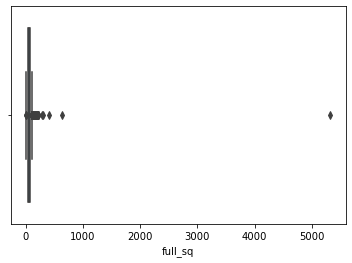

In [14]:
sns.boxplot(x=df["full_sq"])
# sns.boxplot(x=df["kitch_sq"]) примерно то же самое
# sns.boxplot(x=df["life_sq"]) примерно то же самое

<AxesSubplot:xlabel='floor'>

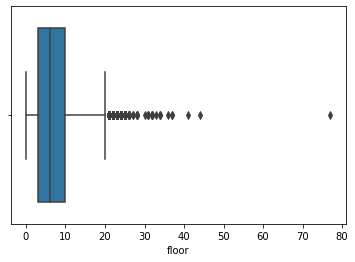

In [15]:
sns.boxplot(x=df["floor"])
# sns.boxplot(x=df["max_floor"]) примерно то же самое

<AxesSubplot:xlabel='material'>

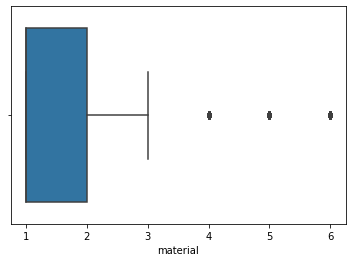

In [16]:
# sns.boxplot(x=df["state"]) примерно то же самое
sns.boxplot(x=df["material"])
# sns.boxplot(x=df["num_room"]) примерно то же самое

<AxesSubplot:xlabel='full_all'>

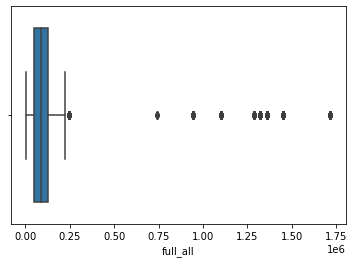

In [17]:
sns.boxplot(x=df["full_all"])

<AxesSubplot:xlabel='price_doc'>

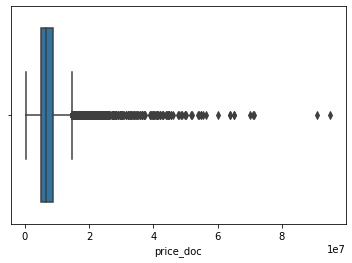

In [18]:
sns.boxplot(x=df["price_doc"])

## 1.3 Визуальный и статистический анализ данных

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

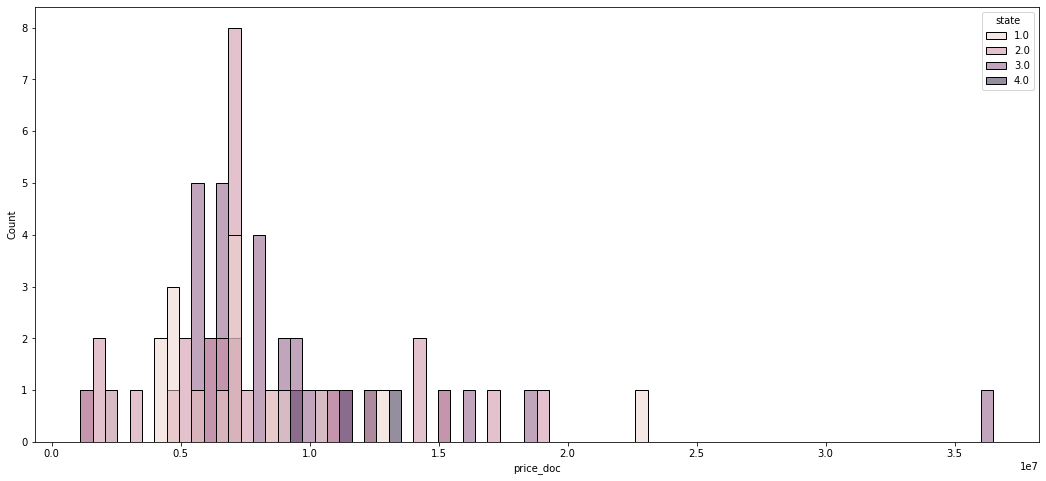

In [22]:
plt.figure(figsize=(18,8))
sns.histplot(data=df.head(100), x="price_doc", hue="state", bins=74)

Прямой зависимости между числом "состояния" квартиры и стоимостью квартиры не видно

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

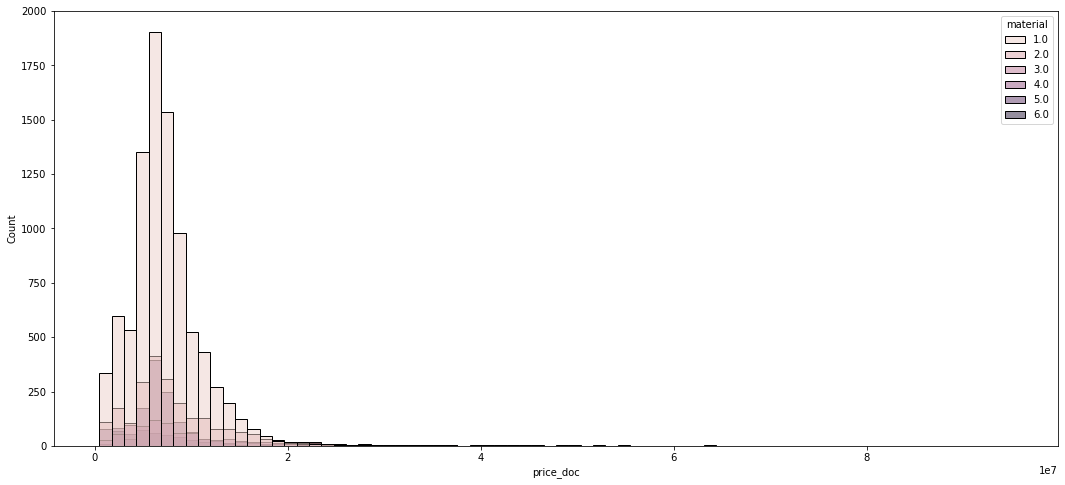

In [4]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", hue="material", bins=74)

Квартиры от 0 до 20 миллионов построены в основном из материала 1

<AxesSubplot:xlabel='price_doc', ylabel='floor'>

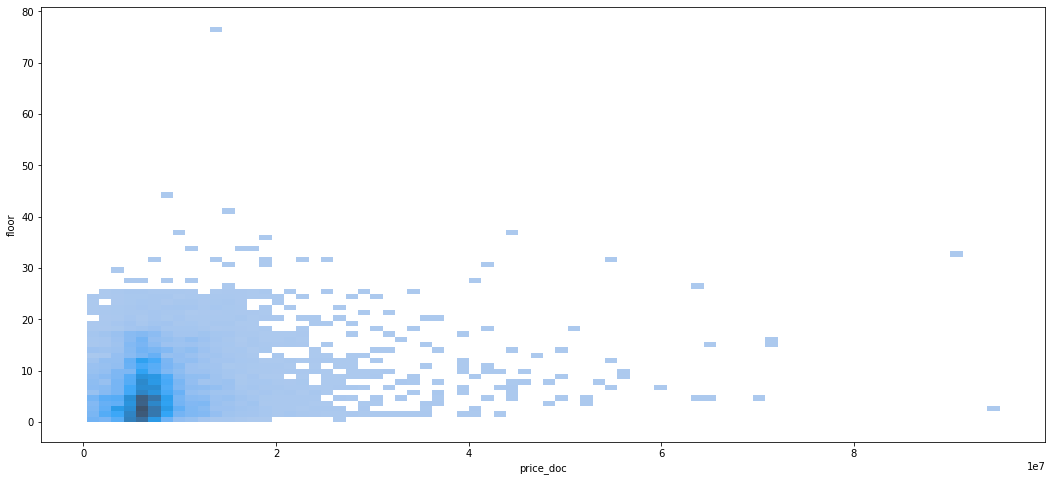

In [13]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", y='floor', bins=74)

Квартиры в основном находятся в квадрате от 0 до 20 миллионов на первых этажах здания (0-10 этажи)

<AxesSubplot:xlabel='price_doc', ylabel='num_room'>

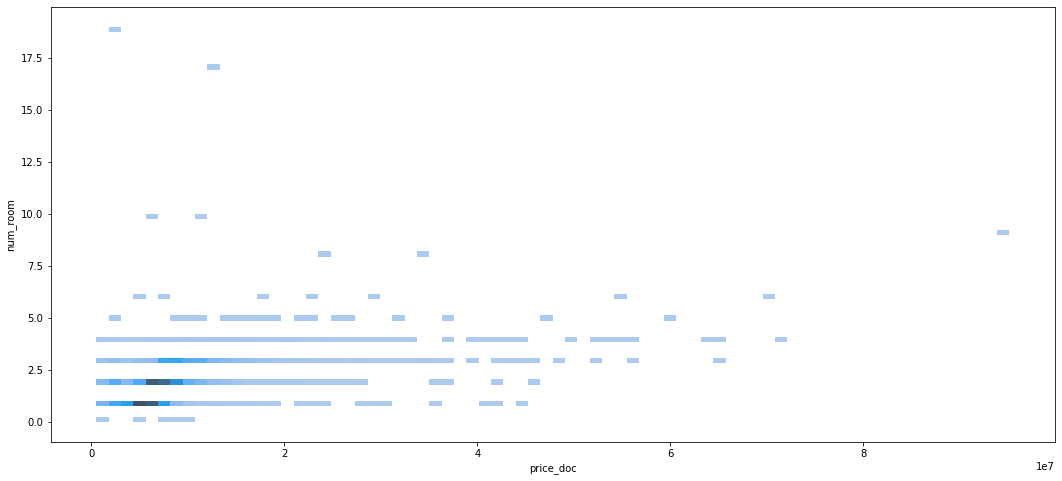

In [16]:
plt.figure(figsize=(18,8))
sns.histplot(data=df, x="price_doc", y='num_room', bins=74)

Квартиры в основном находятся в квадрате от 0 до 20 миллионов с количеством жилых комнат выше 0 и до 3